In [1]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
from scipy.integrate import simps
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
if root_dir not in sys.path:
    sys.path.append(root_dir)
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
from utils import style, hdi, load_spectral_types
style(name="seaborn-notebook")


In [4]:
df_spec = load_spectral_types()
df_spec

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [5]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [6]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [7]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))
boundaries = boundaries[:15]
boundaries

array([[-0.019     ,  0.12400287],
       [ 0.12400287,  0.18800095],
       [ 0.18800095,  0.21900118],
       [ 0.21900118,  0.24100237],
       [ 0.24100237,  0.25900047],
       [ 0.25900047,  0.27500098],
       [ 0.27500098,  0.28800311],
       [ 0.28800311,  0.30000054],
       [ 0.30000054,  0.3120019 ],
       [ 0.3120019 ,  0.32300249],
       [ 0.32300249,  0.33300231],
       [ 0.33300231,  0.34300214],
       [ 0.34300214,  0.35300196],
       [ 0.35300196,  0.36200101],
       [ 0.36200101,  0.376     ]])

In [8]:
c_low = boundaries[:, 0]
c_high = boundaries[:, 1]
c = (c_low + c_high) / 2
dc = c_high-c_low
c, dc

(array([0.05250143, 0.15600191, 0.20350107, 0.23000178, 0.25000142,
        0.26700073, 0.28150205, 0.29400182, 0.30600122, 0.3175022 ,
        0.3280024 , 0.33800223, 0.34800205, 0.35750149, 0.36900051]),
 array([0.14300287, 0.06399808, 0.03100024, 0.02200119, 0.0179981 ,
        0.0160005 , 0.01300213, 0.01199742, 0.01200136, 0.01100059,
        0.00999982, 0.00999982, 0.00999982, 0.00899905, 0.01399899]))

In [9]:
mcmc_dir = join(root_data_dir, "MCMC", "mond", "data")
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC/mond/data'

In [10]:
files = glob(join(mcmc_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(-0.019)_(0.124).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(0.124)_(0.188).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(0.188)_(0.219).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(0.219)_(0.241).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(0.241)_(0.259).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(0.259)_(0.275).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(0.275)_(0.288).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(0.288)_(0.300).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(0.300)_(0.312).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(0.312)_(0.323).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(0.323)_(0.333).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-(0.333)_(0.343).npy',
 '/home2/s20321

# Fungsi interpolasi

In [11]:
from utils import inv_simple, inv_standard, simple, standard

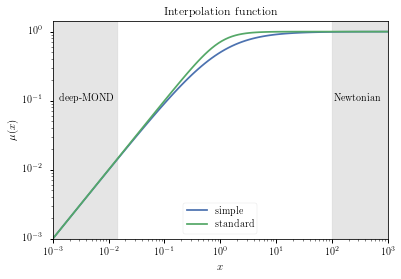

In [12]:
x = np.logspace(-3, 3, 100)
y_simple = simple(x)
y_standard = standard(x)

plt.plot(x, y_simple, label="simple")
plt.plot(x, y_standard, label="standard")
plt.axvspan(0.001, 0.015, alpha=0.2, color="gray")
plt.axvspan(100, 1000, alpha=0.2, color="gray")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$x$")
plt.ylabel(r"$\mu(x)$")
plt.title("Interpolation function")
plt.xlim(x.min(), x.max())
plt.ylim(y_simple.min())
plt.text(0.0013, 0.1, r"deep-MOND", fontsize=10)
plt.text(110, 0.1, r"Newtonian", fontsize=10)
plt.legend()
# plt.savefig(join("img", "fungsi-interpolasi.pdf"), dpi=70)
plt.show()


## Test for 1 group

In [13]:
A9 = df_spec[df_spec['SpT'] == 'A9V']['J-K'].values[0]
F0 = df_spec[df_spec['SpT'] == 'F0V']['J-K'].values[0]
AF = (A9+F0)/2

F9 = df_spec[df_spec['SpT'] == 'F9V']['J-K'].values[0]
G0 = df_spec[df_spec['SpT'] == 'G0V']['J-K'].values[0]
FG = (F9+G0)/2
AF, FG

(0.1355, 0.314)

interpolation function
**Simple**
\begin{aligned}
    \mu(x) = \frac{x}{1+x}
\end{aligned}

**Standard**
\begin{aligned}
    \mu(x) = \sqrt{\frac{x^2}{1+x^2}}
\end{aligned}

## Inverse

**Simple**
\begin{equation*}
    x = \frac{\mu}{1-\mu}
\end{equation*}

**Standard**
\begin{equation*}
    x = \frac{\mu}{\sqrt{1-\mu^2}}
\end{equation*}

In [14]:
index = 0
df = np.load(files[index])
df.shape

(2500, 330, 33)

In [15]:
rho_b = df[:, :, 12:24]
rho_b = rho_b.reshape(-1, 12)
rho_b = rho_b.sum(axis=1)/1E-2
log_mu_0 = df[:, :, 24].reshape(-1)
mu_0 = np.exp(log_mu_0)
length = rho_b.shape[0]
length

825000

In [16]:
rho_b_sample = np.random.choice(rho_b, size=10_000, replace=False)
rho_b_fit = norm.fit(rho_b_sample)

log_mu_0_sample = np.random.choice(log_mu_0, size=10_000, replace=False)
log_mu_0_fit = skewnorm.fit(log_mu_0_sample)

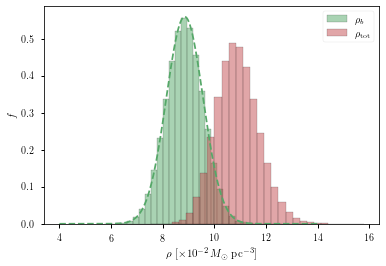

In [17]:
rho = np.linspace(4, 14, 1000)

rhob_tot = rho_b/mu_0

fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(rho_b, bins=30, density=True, label=r'$\rho_{b}$', ec='k', alpha=0.5,color='C1')
ax.hist(rhob_tot, bins=30, density=True, label=r'$\rho_{\textrm{\scriptsize tot}}$', ec='k', alpha=0.5,color='C2')
ax.plot(rho, norm.pdf(rho, *rho_b_fit), color='C1', ls='--')
ax.set_xlabel(r'$\rho$ [$\times 10^{-2} M_{\odot}$ pc$^{-3}$]')
ax.set_ylabel(r'$f$')
ax.legend()
plt.show()

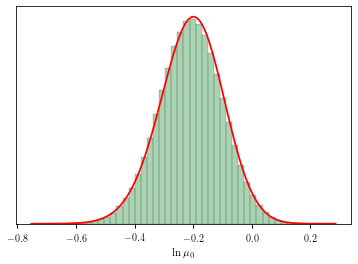

In [18]:
log_mu_0_x = np.linspace(log_mu_0.min(), log_mu_0.max(), 100)

plt.figure()
plt.hist(log_mu_0, bins=50, density=True, ec='k', alpha=0.5,color='C1')
plt.plot(log_mu_0_x, skewnorm.pdf(log_mu_0_x, *log_mu_0_fit), c='red')
plt.xlabel(r"$\ln \mu_0$")
plt.yticks([])
plt.show()

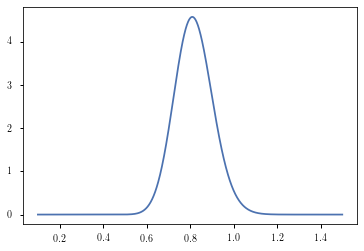

In [19]:
mu_0_x = np.linspace(0.1, 1.5, 1000)

def pdf_mu_0(mu_0, *log_fit):
    return skewnorm.pdf(np.log(mu_0), *log_fit)/mu_0

plt.figure()
plt.plot(mu_0_x, pdf_mu_0(mu_0_x, *log_mu_0_fit))
plt.show()

100%|██████████| 15/15 [00:09<00:00,  1.57it/s]


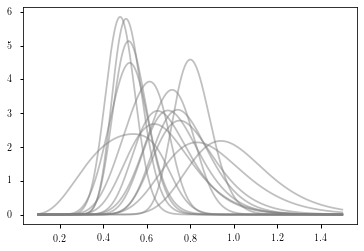

In [20]:
mu_0_x = np.linspace(0.1, 1.5, 1000)
log_mu_0_fits = np.empty((len(files), 3))
plt.figure()
for i, file in enumerate(tqdm(files)):
    df = np.load(file)
    log_mu_0 = df[:, :, 24].reshape(-1)
    log_mu_0_sample = np.random.choice(log_mu_0, size=10_000, replace=False)
    log_mu_0_fit = skewnorm.fit(log_mu_0_sample)
    log_mu_0_fits[i] = log_mu_0_fit
    plt.plot(mu_0_x, pdf_mu_0(mu_0_x, *log_mu_0_fit), c="gray", alpha=0.5)
plt.show()

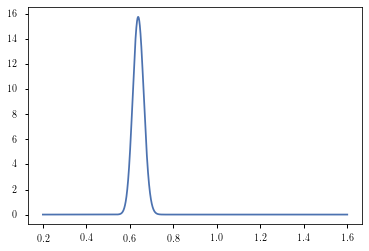

In [21]:
mu_0_x = np.linspace(0.2, 1.6, 10000)
log_mu_0_com = None

def log_pdf_mu_0(mu_0, *fit):
    return skewnorm.logpdf(np.log(mu_0), *fit) - np.log(mu_0)

for i, log_fit in enumerate(log_mu_0_fits):
    if log_mu_0_com is None:
        log_mu_0_com = log_pdf_mu_0(mu_0_x, *log_fit)
    else:
        log_mu_0_com += log_pdf_mu_0(mu_0_x, *log_fit)
log_mu_0_com -= log_mu_0_com.max()
area = np.trapz(np.exp(log_mu_0_com), mu_0_x)
p_mu_0_com = np.exp(log_mu_0_com) / area
plt.plot(mu_0_x, p_mu_0_com)

In [22]:
mu_0_com_fit, _ = curve_fit(skewnorm.pdf, mu_0_x, p_mu_0_com, p0=[1, 1, 0.1])
mu_0_com_fit

array([0.73020737, 0.62566983, 0.02869208])

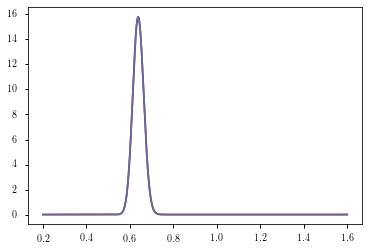

In [23]:
plt.figure()
plt.plot(mu_0_x, skewnorm.pdf(mu_0_x, *mu_0_com_fit), c='red')
plt.plot(mu_0_x, p_mu_0_com, ls="-")
plt.show()

In [24]:
hpd, modes = hdi(lambda x: skewnorm.pdf(x, *mu_0_com_fit), 0.2, 1.3, alpha=0.32)
low, high = hpd[0]
mode = modes[0]

print(f"{mode:.3f} +{high-mode:.3f}/-{mode-low:.3f}")

0.640 +0.020/-0.030


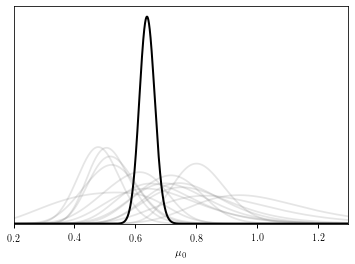

In [26]:
plt.figure()
for log_fit in log_mu_0_fits:
    plt.plot(mu_0_x, pdf_mu_0(mu_0_x, *log_fit), c="gray", alpha=0.2)
plt.plot(mu_0_x, skewnorm.pdf(mu_0_x, *mu_0_com_fit), c='black', lw=2)
plt.ylim(0)
plt.xlim(mu_0_x.min(), 1.3)
plt.yticks([])
plt.xlabel(r"$\mu_0$")
plt.savefig(join("img", "mu0.pdf"), dpi=70)
plt.show()

1.560 +0.060/-0.060


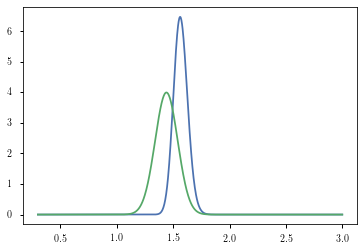

In [29]:
def pdf_nu_0(nu_0, *fit):
    return skewnorm.pdf(1/nu_0, *fit)/nu_0**2

nu_0_x = np.linspace(0.3, 3, 1000)

hpd, modes = hdi(lambda x: pdf_nu_0(x, *mu_0_com_fit), 0.5, 4, alpha=0.32)
low, high = hpd[0]
mode = modes[0]

print(f"{mode:.3f} +{high-mode:.3f}/-{mode-low:.3f}")

plt.plot(nu_0_x, pdf_nu_0(nu_0_x, *mu_0_com_fit))
plt.plot(nu_0_x, norm.pdf(nu_0_x, loc=1.44, scale=0.1))
plt.show()

In [27]:
# def pdf_mu_0(mu_0, *fit):
#     mu_0 = np.atleast_1d(mu_0)
#     return skewnorm.pdf(mu_0, *fit)

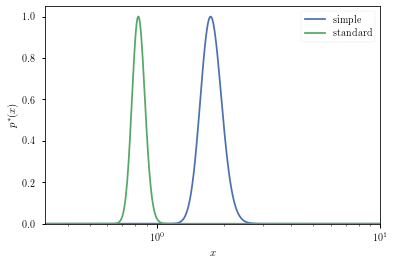

In [31]:
def pdf_x(x, mu_func, *fit):
    x = np.atleast_1d(x)
    mu_0 = mu_func[0](x)
    val = skewnorm.pdf(mu_0, *fit)*np.abs(mu_func[1](x))
    return val

def mu0_simple(x):
    return x/(1+x)
def mu0_deriv_simple(x):
    return 1/(1+x)**2

def mu0_standard(x):
    return x/np.sqrt(1+x**2)
def mu0_deriv_standard(x):
    return 1/np.power(1+x**2, 3/2)

mu0_simple_func = [mu0_simple, mu0_deriv_simple]
mu0_standard_func = [mu0_standard, mu0_deriv_standard]

x = np.logspace(-0.5, 1., 500)
pdf_x_simple = pdf_x(x, mu0_simple_func, *mu_0_com_fit)
pdf_x_standard = pdf_x(x, mu0_standard_func, *mu_0_com_fit)

plt.plot(x, pdf_x_simple/pdf_x_simple.max(), label='simple')
plt.plot(x, pdf_x_standard/pdf_x_standard.max(), label='standard')
plt.xlabel(r'$x$')
plt.ylabel(r'$p^{*}(x)$')
plt.xscale('log')
plt.xlim(x.min(), x.max())
plt.ylim(0)
plt.legend()
# plt.savefig(join("img", "pdf-x.png"), dpi=300)
plt.show()

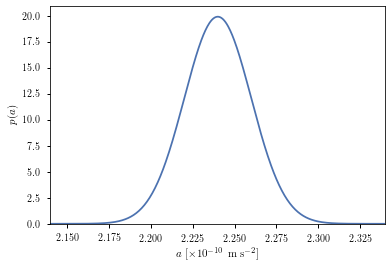

In [32]:
# the absolute value of sun sentripetal acceleration in the Galaxy
a_odot = 2.24
sigma_a_odot = 0.02
a = np.linspace(a_odot-sigma_a_odot*5, a_odot+sigma_a_odot*5, 500)
def pdf_a(a, *a_odot):
    return norm.pdf(a, *a_odot)

plt.plot(a, pdf_a(a, a_odot, sigma_a_odot))
plt.xlabel(r'$a$ [$\times 10^{-10}$ m s$^{-2}$]')
plt.ylabel(r'$p(a)$')
plt.xlim(a.min(), a.max())
plt.ylim(0)
plt.savefig(join("img", "pdf-a.png"), dpi=300)
plt.show()

In [33]:
sigma_a_odot/a_odot

0.008928571428571428

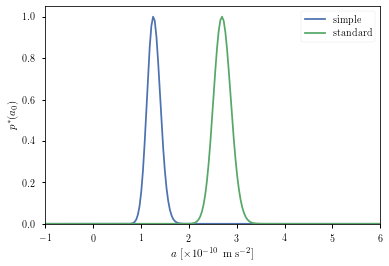

In [34]:
def pdf_a0(a0, mu0_func, *args):
    odot = args[0:2]
    mu0_fit = args[2:]
    a = np.linspace(odot[0]-odot[1]*5, odot[0]+odot[1]*5, 500)
    a0 = np.atleast_1d(a0)
    A0, A = np.meshgrid(a0, a)
    integrand = pdf_a(A, *odot)*pdf_x(A/A0, mu0_func, *mu0_fit)*A/A0**2
    integral = simps(integrand, a, axis=0)
    area = simps(integral, a0)
    return integral/area


args = [a_odot, sigma_a_odot, *mu_0_com_fit]

a0 = np.linspace(-1, 6, 200)
pdf_a0_simple = pdf_a0(a0, mu0_simple_func, *args)
pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
plt.plot(a0, pdf_a0_simple/pdf_a0_simple.max(), label='simple')
plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), label="standard")
plt.xlabel(r'$a$ [$\times 10^{-10}$ m s$^{-2}$]')
plt.ylabel(r'$p^*(a_0)$')
plt.xlim(a0.min(), a0.max())
plt.ylim(0)
plt.legend()
# plt.savefig(join("img", "pdf-a0.png"), dpi=300)
plt.show()

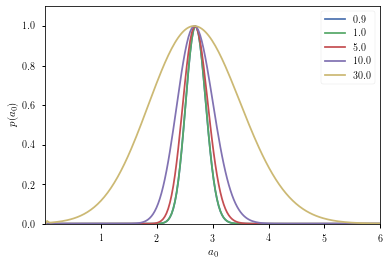

In [35]:
# just for fun
# what if the uncertainty of a_odot is bigger?
a0 = np.linspace(0.0001, 6, 200)
for s in [sigma_a_odot/a_odot, 0.01, 0.05, 0.10, 0.30]:
    args = [a_odot, s*a_odot, *mu_0_com_fit]
    pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
    plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), label=f"{s*100:.01f}%")
plt.xlabel(r'$a_0$')
plt.ylabel(r'$p(a_0)$')
plt.xlim(a0.min(), a0.max())
plt.ylim(0, 1.1)
plt.legend()
plt.show()

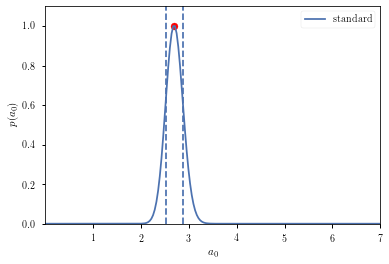

2.690 +0.190/-0.170


In [41]:
args = [a_odot, sigma_a_odot, *mu_0_com_fit]

hpd, modes = hdi(lambda x: pdf_a0(x, mu0_standard_func, *args), low=0.000001, high=10, alpha=0.32)
low, high = hpd[0]
mode = modes[0]

a0 = np.linspace(0.0001, 7, 200)
pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), label="standard")
plt.axvline(low, color='C0', ls='--')
plt.axvline(high, color='C0', ls='--')
plt.scatter([mode], [1], color='r')
plt.xlabel(r'$a_0$')
plt.ylabel(r'$p(a_0)$')
plt.xlim(a0.min(), a0.max())
plt.ylim(0, 1.1)
plt.legend()
plt.show()

print(f"{mode:.3f} +{high-mode:.3f}/-{mode-low:.3f}")

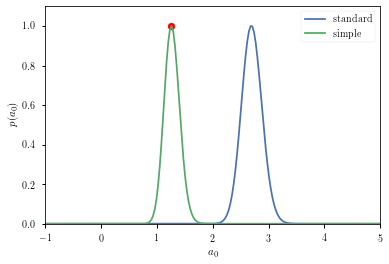

1.260 +0.140/-0.130


In [42]:
args = [a_odot, sigma_a_odot, *mu_0_com_fit]

hpd, modes = hdi(lambda x: pdf_a0(x, mu0_simple_func, *args), low=-1, high=5, alpha=0.32)
low, high = hpd[0]
mode = modes[0]

a0 = np.linspace(-1, 5, 200)
pdf_a0_simple = pdf_a0(a0, mu0_simple_func, *args)
pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), label="standard")
plt.plot(a0, pdf_a0_simple/pdf_a0_simple.max(), label="simple")
# plt.axvline(low, color='C0', ls='--')
# plt.axvline(high, color='C0', ls='--')
plt.scatter([mode], [1], color='r')
plt.xlabel(r'$a_0$')
plt.ylabel(r'$p(a_0)$')
plt.xlim(a0.min(), a0.max())
plt.ylim(0, 1.1)
plt.legend()
plt.show()

print(f"{mode:.3f} +{high-mode:.3f}/-{mode-low:.3f}")